In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'data/drinks.csv'
drinks = pd.read_csv(file_path) # read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.

In [6]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [7]:
# 두 피처간의 상관계수를 구합니다.
# pearson은 상관계수를 구하는 방법 중 하나로 가장 널리 쓰인다.
corr=drinks[['beer_servings','wine_servings']].corr(method='pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [24]:
# 피처 간의 상관계행렬을 구합니다.
cols=['beer_servings','spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr=drinks[cols].corr(method='pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


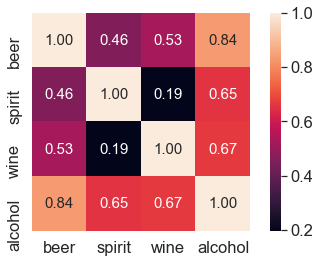

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# corr 행렬 히트맵을 시각화
# 히트맵이 밝을 수록 연관도가 높다
cols_view=['beer','spirit','wine','alcohol']
sns.set(font_scale=1.5)
hm=sns.heatmap(corr.values,cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15}, yticklabels=cols_view, xticklabels=cols_view)
plt.tight_layout()
plt.show()

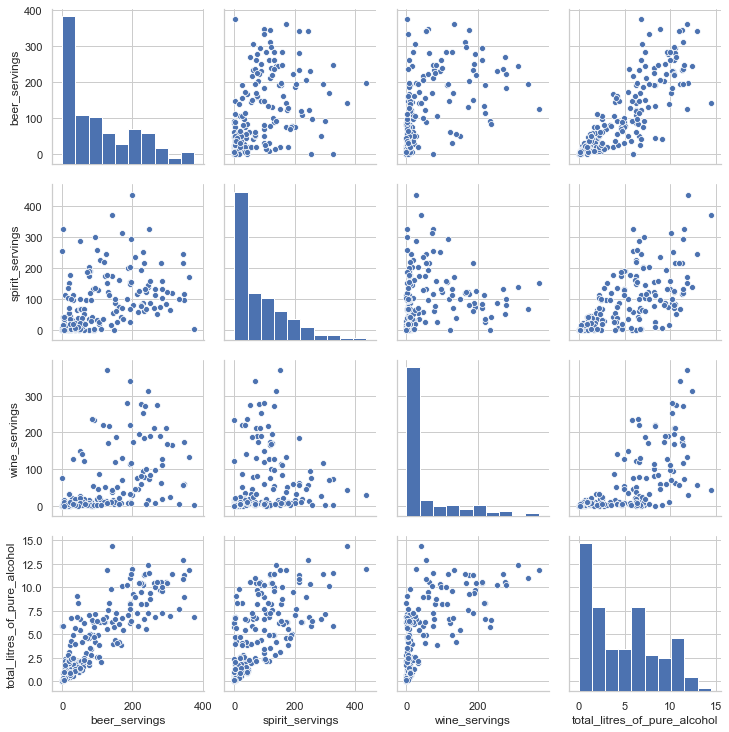

In [29]:
#시각화 라이브러리를 이용한 피처 간의 산점도 그래프를 출력
sns.set(style='whitegrid',context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings','wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)

plt.show()

In [30]:
# fillna() : 피처의 결측값을 OT로 채워줍니다 -> 다른 국가 Others를 줄여서 사용
# 결측 데이터를 처리합니다: 기타 대륙으로 통합->OT
drinks['continent']=drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


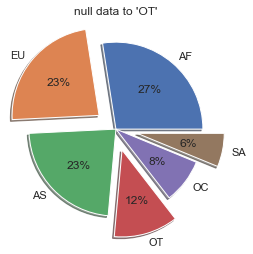

In [36]:
# 파이차트로 시각화하기
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0,0.25,0,0.25,0,0.25) # pie에서 떨어진 거리를 나타낸다.

plt.pie(fracs1,explode=explode, labels=labels, autopct='%.0f%%', shadow=True) #퍼센트에 따라 원형그래프로 나타낸다.
plt.title('null data to \'OT\'')
plt.show()

In [34]:
# Mini Quiz 1-2
print(drinks['continent'].value_counts().index.tolist()) # 대륙의 인덱스
print(drinks['continent'].value_counts().values.tolist()) # 대륙의 인덱스 출현 수

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']
[53, 45, 44, 23, 16, 12]


In [37]:
# agg() : 함수 파라미터를 병렬로 설정하여 그룹에 대한 여러가지 연산 결과를 동시에 얻을 수 있는 함수
# agg['mean','min','max','sum'] 과 같이 사용할 수 있습니다.
# 대륙별 spirit_servings의 평균, 최대, 최소, 합계를 계산합니다.

result=drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [39]:
# 전체 평균 보다 많은 알코올을 섭취하는 대륙을 구합니다.
total_mean=drinks.total_litres_of_pure_alcohol.mean()
continent_mean=drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
over_mean=continent_mean[continent_mean>=total_mean]
print(over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [40]:
# 평균 beer_servings가 가장 높은 대륙을 구합니다.
# idxmax() : 시리즈 객체에서 가장 값이 큰 인덱스를 반환
beer_continent=drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


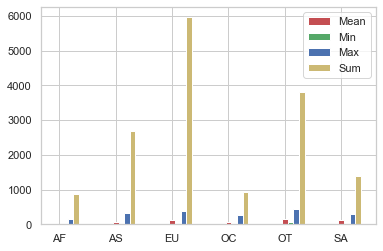

In [44]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합게를 시각화 합니다.
n_groups=len(result.index)
means=result['mean'].tolist()
mins=result['min'].tolist()
maxs=result['max'].tolist()
sums=result['sum'].tolist()

index=np.arange(n_groups)
bar_width=0.1

rects1=plt.bar(index,means, bar_width, color='r', label='Mean')
rects2=plt.bar(index+bar_width,mins, bar_width, color='g', label='Min')
rects3=plt.bar(index+bar_width*2,maxs, bar_width, color='b', label='Max')
rects4=plt.bar(index+bar_width*3,sums, bar_width, color='y', label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend(loc='upper right')
plt.show()

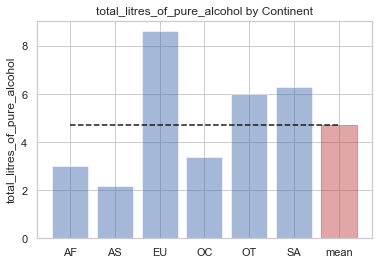

In [59]:
# 대륙별 total_litres_of_pure_alcohol을 시각화합니다

continents=continent_mean.index.tolist()
continents.append('mean')

x_pos=np.arange(len(continents))
alcohol=continent_mean.tolist()
alcohol.append(total_mean)

bar_list=plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents)-1].set_color('r')
plt.plot([0.,6],[total_mean,total_mean],"k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

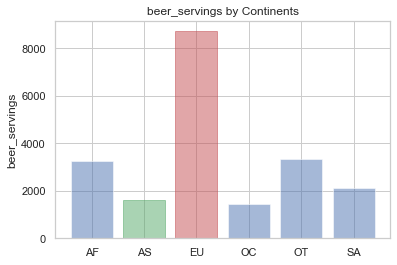

In [54]:
# 대륙별 beer_servings를 시각화합니다.

beer_group=drinks.groupby('continent')['beer_servings'].sum()
continents=beer_group.index.tolist()
y_pos=np.arange(len(continents))
alcohol=beer_group.tolist()

bar_list=plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
bar_list[continents.index("AS")].set_color('g') # 막대 색상 변경
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continents')

plt.show()

In [53]:
#Mini Quiz 1-3
print(result)

print(means)
print(mins)
print(maxs)
print(sums)

[16.339622641509433, 60.84090909090909, 132.55555555555554, 58.4375, 165.7391304347826, 114.75]
[0, 0, 0, 0, 68, 25]
[152, 326, 373, 254, 438, 302]
[866, 2677, 5965, 935, 3812, 1377]
                 mean  min  max   sum
continent                            
AF          16.339623    0  152   866
AS          60.840909    0  326  2677
EU         132.555556    0  373  5965
OC          58.437500    0  254   935
OT         165.739130   68  438  3812
SA         114.750000   25  302  1377


In [68]:
# 통계적으로 차이를 검정하는 과정
# 아프리카와 유럽 간의 맥주 소비량 차이를 검정합니다.

africa=drinks.loc[drinks['continent']=='AF']
europe=drinks.loc[drinks['continent']=='EU']

# t-test 두 집단 간 평균의 차이에 대한 검정방법
# 모집단의 평균 등과 같이 실제 정보를 모를때 두 집단의 차이에 대해 검정하는 방법 
# 1. 분산이 같은 경우 2. 분산이 다른 경우
from scipy import stats
tTestResult=stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar=stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False)
print("두 집단의 분산이 같은 경우 : t-statistic : %.3f , p-value : %.3f" % tTestResult)
print("두 집단의 분산이 다른 경우 : t-statistic : %.3f , p-value : %.3f" % tTestResultDiffVar)

# p-value는 가설이 얼마나 믿을 만한 것인지 나타내는 지표 (유의확률)
# 두 집단의 평균은 같다-> 기각 -> 믿을만하다.

두 집단의 분산이 같은 경우 : t-statistic : -7.268 , p-value : 0.000
두 집단의 분산이 다른 경우 : t-statistic : -7.144 , p-value : 0.000


In [70]:
# total_servings 피처를 생성
drinks['total_servings']=drinks['beer_servings']+drinks['wine_servings']+drinks['spirit_servings']

#술 소비량 대비 알코올 비율 치퍼를 생성합니다.
drinks['alcohol_rate']=drinks['total_litres_of_pure_alcohol']/drinks['total_servings']
drinks['alcohol_rate']=drinks['alcohol_rate'].fillna(0)

#순위 정보를 생성합니다.
c_rank=drinks[['country', 'alcohol_rate']]
c_rank=c_rank.sort_values(by=['alcohol_rate'],ascending=0)
c_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


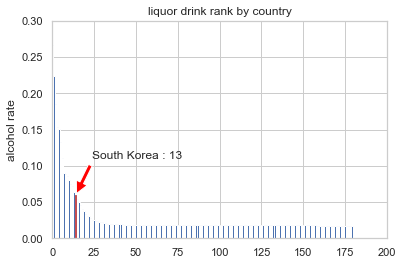

In [80]:
# 국가별 순위 정보를 그래프로 시각화합니다.

country_list=c_rank.country.tolist()
x_pos=np.arange(len(country_list))
rank=c_rank.alcohol_rate.tolist()

bar_list=plt.bar(x_pos,rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by country')
plt.axis([0,200,0,0.3])

korea_rank=country_list.index("South Korea")
korea_alc_rate=c_rank[c_rank['country']=='South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank-1), xy=(korea_rank, korea_alc_rate), xytext=(korea_rank + 10, korea_alc_rate+0.05),
arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()